## GF180MCU technology - V$_{GS}$ Sweep

### Disable auto-scrolling

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Simulation

In [2]:
%%writefile .spiceinit
set ngbehavior=hs
set ng_nomodcheck
set color0=white
set color1=black
set xbrushwidth=2

Overwriting .spiceinit


In [3]:
%%writefile netlist_pmos.spice
* pmos_gf180_sweep
* VGS sweep

.include "/Users/talarico/share/openmpw/pdk_gf180/gf180mcuC/libs.tech/ngspice/design.ngspice"
.lib "/Users/talarico/share/openmpw/pdk_gf180/gf180mcuC/libs.tech/ngspice/sm141064.ngspice" typical

.option nomod post

.param width=10u
Xmp vdp vgp 0 vbp pfet_03v3 w=width l=0.28u 
+ AD={width*0.24u} AS={width*0.24u} 
+ PD={2*(width + 0.24u)} PS={2*(width + 0.24u)}
vsdp     0  vdp        dc 0.9
vsgp     0  vgp        dc 0.9
vsbp     0  vbp        dc 0
.op

.control
save v(vdp) v(vgp) @m.xmp.m0[id] @m.xmp.m0[gm]  @m.xmp.m0[cgg]
dc vsgp 0 1.8 0.01
let id_p=@m.xmp.m0[id] 
let gm_p=@m.xmp.m0[gm] 
let cgg_p=@m.xmp.m0[cgg] 
let vsg_p=-v(vgp)
display
write ./spiceout/pmos_gf180_vgs_sweep.raw vsg_p id_p gm_p cgg_p
.endc

.end

Overwriting netlist_pmos.spice


In [4]:
!ngspice -b netlist_pmos.spice


Note: Compatibility modes selected: hs



Circuit: * pmos_gf180_sweep

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 181
Here are the vectors currently active:

Title: * pmos_gf180_sweep
Name: dc1 (DC transfer characteristic)
Date: Wed Dec  6 08:40:12  2023

    @m.xmp.m0[cgg]      : capacitance, real, 181 long
    @m.xmp.m0[gm]       : admittance, real, 181 long
    @m.xmp.m0[id]       : current, real, 181 long
    cgg_p               : capacitance, real, 181 long
    gm_p                : admittance, real, 181 long
    id_p                : current, real, 181 long
    v-sweep             : voltage, real, 181 long [default scale]
    vdp                 : voltage, real, 181 long
    vgp                 : voltage, real, 181 long
    vsg_p               : voltage, real, 181 long
binary raw file "./spiceout/pmos_gf180_vgs_sweep.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage

In [5]:
%%writefile netlist_nmos.spice
* nmos_gf180_sweep
* VGS sweep

.include "/Users/talarico/share/openmpw/pdk_gf180/gf180mcuC/libs.tech/ngspice/design.ngspice"
.lib "/Users/talarico/share/openmpw/pdk_gf180/gf180mcuC/libs.tech/ngspice/sm141064.ngspice" typical

.option nomod

.param width=10u
Xmn vdn vgn 0 vbn nfet_03v3 w=width l=0.28u 
+ AD={width*0.24u} AS={width*0.24u} 
+ PD={2*(width + 0.24u)} PS={2*(width + 0.24u)}
vdsn     vdn 0       dc 0.9
vgsn     vgn 0       dc 0.9
vsbn     vbn 0       dc 0
.op

.control
save v(vdn) v(vgn) @m.xmn.m0[id] @m.xmn.m0[gm]  @m.xmn.m0[cgg]
dc vgsn 0 1.8 0.01
let id_n=@m.xmn.m0[id] 
let gm_n=@m.xmn.m0[gm] 
let cgg_n=@m.xmn.m0[cgg] 
let vgs_n=v(vgn)
display
write ./spiceout/nmos_gf180_vgs_sweep.raw vgs_n id_n gm_n cgg_n
.endc

.end

Overwriting netlist_nmos.spice


In [6]:
!ngspice -b netlist_nmos.spice


Note: Compatibility modes selected: hs



Circuit: * nmos_gf180_sweep

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 181
Here are the vectors currently active:

Title: * nmos_gf180_sweep
Name: dc1 (DC transfer characteristic)
Date: Wed Dec  6 08:40:12  2023

    @m.xmn.m0[cgg]      : capacitance, real, 181 long
    @m.xmn.m0[gm]       : admittance, real, 181 long
    @m.xmn.m0[id]       : current, real, 181 long
    cgg_n               : capacitance, real, 181 long
    gm_n                : admittance, real, 181 long
    id_n                : current, real, 181 long
    v-sweep             : voltage, real, 181 long [default scale]
    vdn                 : voltage, real, 181 long
    vgn                 : voltage, real, 181 long
    vgs_n               : voltage, real, 181 long
binary raw file "./spiceout/nmos_gf180_vgs_sweep.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage

### Read and process the simulation data (PMOS device)

In [7]:
# PyPlot_gf180_sweep.py

from PyLTSpice import RawRead # install PyLTSpice ver 3.1: pip install PyLTSpice==3.1
import matplotlib.pyplot as plt
import math

# PMOS
LTR = RawRead("./spiceout/pmos_gf180_vgs_sweep.raw") 

print(LTR.get_trace_names())
print("\n")
print(LTR.get_raw_property())
print("\n")
steps = LTR.get_steps()
num_steps = len(steps) 
print('number of sweeps in the simulation:', num_steps)

# objects containing the data
vsg_p = LTR.get_trace('v(vsg_p)')
id_p = LTR.get_trace('i(id_p)')
gm_p = LTR.get_trace('gm_p')
cgg_p = LTR.get_trace('cgg_p')

# extract the data from the objects
if num_steps == 1:
   VSGp  = vsg_p.get_wave(0)
   IDp  = id_p.get_wave(0)
   GMp  = gm_p.get_wave(0)
   CGGp  = cgg_p.get_wave(0)


Reading file with encoding  utf_8
File contains 5 traces, reading 5
Binary RAW file with Normal access
['v(v-sweep)', 'v(vsg_p)', 'i(id_p)', 'gm_p', 'cgg_p']


OrderedDict([('Filename', PosixPath('spiceout/pmos_gf180_vgs_sweep.raw')), (' * pmos_gf180_sweep', ''), ('Date', 'Wed Dec  6 08:40:12  2023'), ('Plotname', 'DC transfer characteristic'), ('Flags', 'real'), ('No. Variables', 5), ('No. Points', 181), ('Variables', ['v(v-sweep)', 'v(vsg_p)', 'i(id_p)', 'gm_p', 'cgg_p'])])


number of sweeps in the simulation: 1


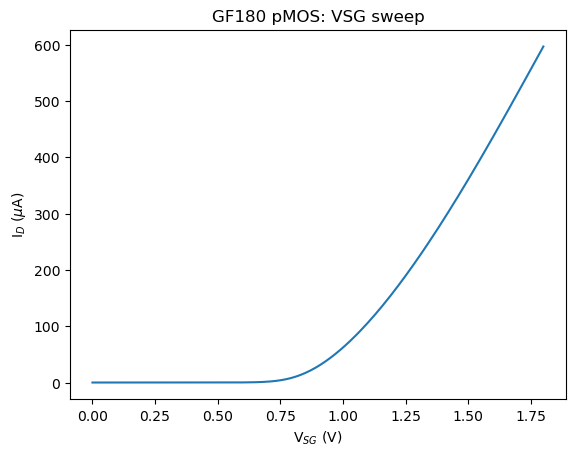

In [8]:
fig1 = plt.figure()
plt.title("GF180 pMOS: VSG sweep" )
plt.xlabel("V$_{SG}$ (V)")
plt.ylabel("I$_D$ ($\mu$A)")
# plt.yscale("log") # uncomment to plot y on log scale
plt.plot(VSGp,IDp*1e6)
plt.show()    

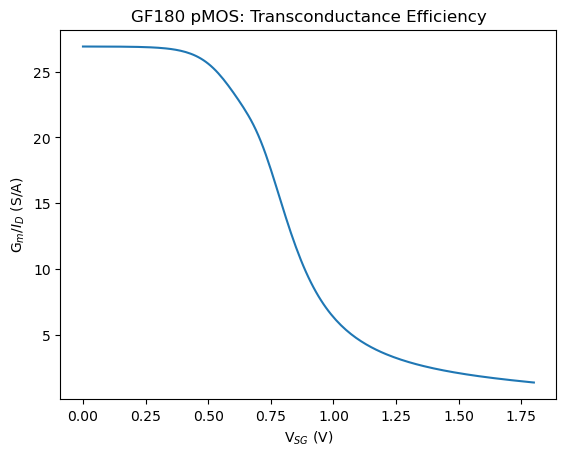

In [9]:
fig2 = plt.figure()
plt.title("GF180 pMOS: Transconductance Efficiency" )
plt.xlabel('V$_{SG}$ (V)')
plt.ylabel("G$_m/I_D$ (S/A)")
plt.plot(VSGp,GMp/IDp)
plt.show()    

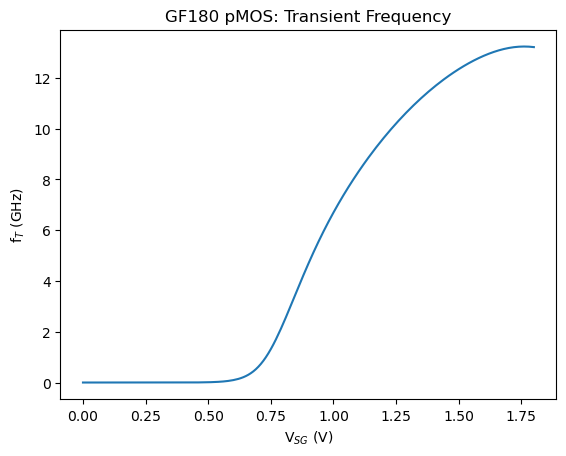

In [10]:
fig3 = plt.figure()
plt.title("GF180 pMOS: Transient Frequency" )
plt.xlabel('V$_{SG}$ (V)')
plt.ylabel('f$_{T}$ (GHz)')
plt.plot(VSGp,1e-9*GMp/CGGp/2/math.pi)

plt.show()    

### Read and process the simulation data (NMOS device)

In [11]:
# NMOS
LT = RawRead("./spiceout/nmos_gf180_vgs_sweep.raw") 

print(LT.get_trace_names())
print("\n")
print(LT.get_raw_property())
print("\n")
steps = LT.get_steps()
num_steps = len(steps) 
print('number of sweeps in the simulation:', num_steps)

# objects containing the data
vgs_n = LT.get_trace('v(vgs_n)')
id_n = LT.get_trace('i(id_n)')
gm_n = LT.get_trace('gm_n')
cgg_n = LT.get_trace('cgg_n')

# extract the data from the objects
if num_steps == 1:
   VGSn  = vgs_n.get_wave(0)
   IDn  = id_n.get_wave(0)
   GMn  = gm_n.get_wave(0)
   CGGn  = cgg_n.get_wave(0)


Reading file with encoding  utf_8
File contains 5 traces, reading 5
Binary RAW file with Normal access
['v(v-sweep)', 'v(vgs_n)', 'i(id_n)', 'gm_n', 'cgg_n']


OrderedDict([('Filename', PosixPath('spiceout/nmos_gf180_vgs_sweep.raw')), (' * nmos_gf180_sweep', ''), ('Date', 'Wed Dec  6 08:40:12  2023'), ('Plotname', 'DC transfer characteristic'), ('Flags', 'real'), ('No. Variables', 5), ('No. Points', 181), ('Variables', ['v(v-sweep)', 'v(vgs_n)', 'i(id_n)', 'gm_n', 'cgg_n'])])


number of sweeps in the simulation: 1


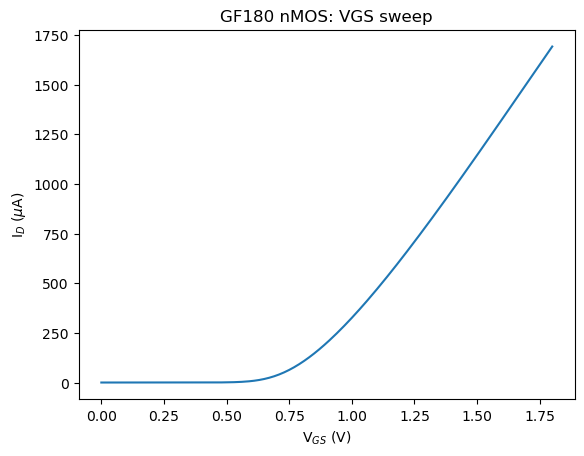

In [12]:
fig1 = plt.figure()
plt.title("GF180 nMOS: VGS sweep" )
plt.xlabel("V$_{GS}$ (V)")
plt.ylabel("I$_D$ ($\mu$A)")
# plt.yscale("log") # uncomment to plot y on log scale
plt.plot(VGSn,IDn*1e6)
plt.show()    


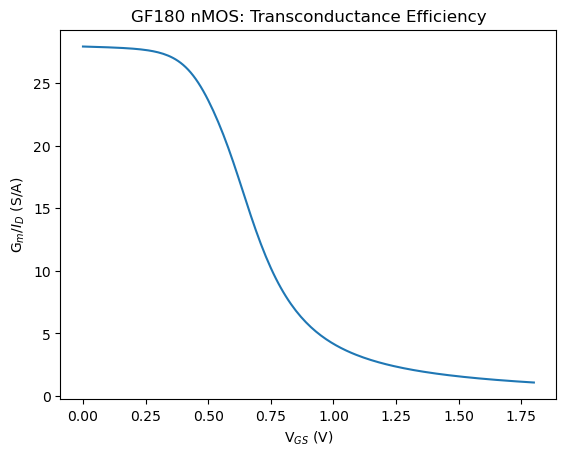

In [13]:
fig2 = plt.figure()
plt.title("GF180 nMOS: Transconductance Efficiency" )
plt.xlabel('V$_{GS}$ (V)')
plt.ylabel("G$_m/I_D$ (S/A)")
plt.plot(VGSn,GMn/IDn)
plt.show()    

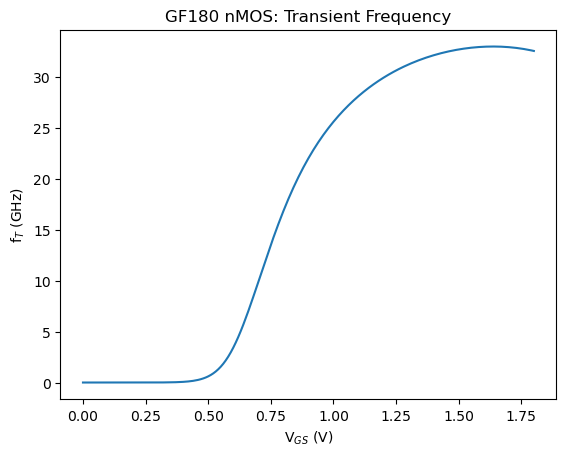

In [14]:
fig3 = plt.figure()
plt.title("GF180 nMOS: Transient Frequency" )
plt.xlabel('V$_{GS}$ (V)')
plt.ylabel('f$_{T}$ (GHz)')
plt.plot(VGSn,1e-9*GMn/CGGn/2/math.pi)
plt.show()    